# Infinte Square Well - Example Problem

Our initial wave function is
$$
\psi(x, 0) = \sqrt{\frac{735}{L}} \left[ \left( \frac{x}{L} \right)^3 - \frac{11}{7} \left( \frac{x}{L} \right)^2 + \frac{4}{7} \left( \frac{x}{L} \right) \right].
$$

Let's plot it up!  I'll set $L = 1$ for niceness.

Text(0, 0.5, '$\\psi(x,0)$')

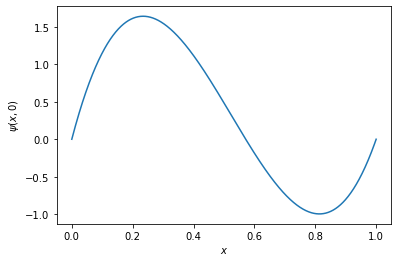

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x):
    return np.sqrt(735) * ( x**3 - 11/7 * x**2 + 4/7 * x)

x = np.linspace(0, 1, 1000)
psi0 = psi(x)

plt.plot(x, psi_0)
plt.xlabel("$x$")
plt.ylabel(r"$\psi(x,0)$")

Let's plot the square as well - that's the probability density.

Text(0, 0.5, '$|\\psi(x,0)|^2$')

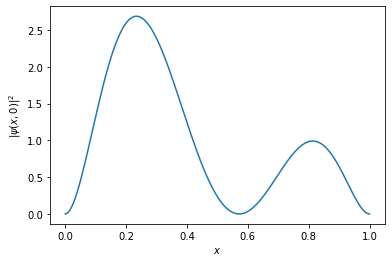

In [13]:
plt.plot(x, np.abs(psi_0)**2)
plt.xlabel("$x$")
plt.ylabel(r"$|\psi(x,0)|^2$")

We can calculate some properties as well.  For example, what is the probability of finding the particle between $x = L/2$ and $x = L$?

In [21]:
import scipy.integrate as integrate

def psi2(x):
    return np.abs(psi(x))**2

P = integrate.quad(psi2, 0.5, 1)
print(f"The probability of finding the particle between L/2 and L is {P[0]*100:.1f}%.")

The probability of finding the particle between L/2 and L is 22.7%.


Or what is the expectation value $\langle x \rangle$?

In [26]:
def psi2x(x):
    return x * psi2(x)

x_exp = integrate.quad(psi2x, 0, 1)
print(f"The expectation value of x is {x_exp[0]:.3f}.")

The expectation value of x is 0.375.


What about energy probabilities?

In [33]:
def phi(x, n):
    return np.sqrt(2) * np.sin(n * np.pi * x)

def phi1_psi(x):
    return phi(x, 1) * psi(x)

c1 = integrate.quad(phi1_psi, 0, 1)
P1 = np.abs(c1)**2

print(f"The probability of measuring E_1 is {P1[0]*100:.1f}%.")

The probability of measuring $E_1$ is 12.5%.


Okay, now for the hard thing. We want to switch to the energy basis.  Rather than copying what we did in class, though (finding the coefficients $c_n$ by hand), let's do it all numerically.

c1 = 0.353
c2 = 0.927
c3 = 0.013
c4 = 0.116


Text(0, 0.5, '$\\psi(x, 0)$')

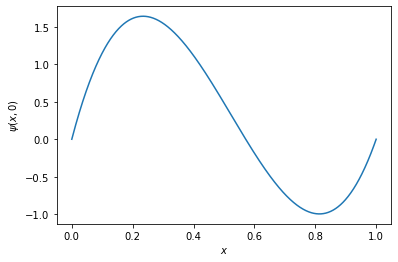

In [52]:
def coef(n):
    
    def phin_psi(x):
        return phi(x, n) * psi(x)
    
    c = integrate.quad(phin_psi, 0, 1)
    return c[0]

# print the first few coefficients to check our work
print(f"c1 = {coef(1):.3f}\nc2 = {coef(2):.3f}\nc3 = {coef(3):.3f}\nc4 = {coef(4):.3f}")
    
psi_energy = np.zeros(1000)
for i in range(100):
    psi_energy += coef(i+1) * phi(x, i+1)

plt.plot(x, psi_energy)
plt.xlabel("$x$")
plt.ylabel("$\psi(x, 0)$")

What about at a later time?  Add in the time exponentials.

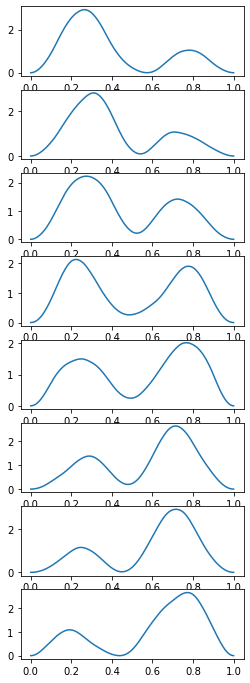

In [91]:
def psi_t(x, t):
    psi_e = 0 + 0j
    for i in range(100):
        n = i+1
        psi_e += coef(n) * phi(x, n) * np.exp(-1j * n**2 * np.pi**2 / 2.0 * t)
    
    return psi_e

fig = plt.figure(figsize=(4, 12))

N = 8
t = np.linspace(0.02, 0.2, N)
for i in range(N):
    ax = fig.add_subplot(N, 1, i+1)
    psi_energy = psi_t(x, t[i])
    ax.plot(x, np.abs(psi_energy)**2)


This would obviously be better as an animation.